In [4]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = (imageio.imread('../assignment04/0.tiff') > 127).astype(np.uint8)

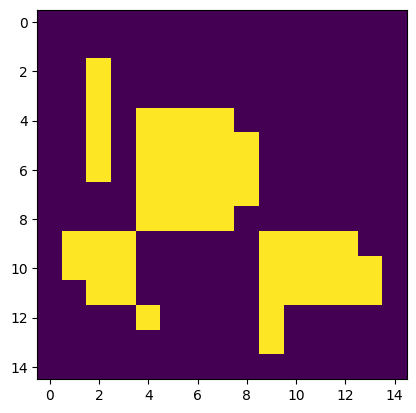

In [6]:
plt.imshow(image)